In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import transformations
import db_utils


In [4]:
rds = db_utils.RDSDatabaseConnector()

In [2]:
df = pd.read_csv('loan_data.csv')

In [9]:
df.info()
# can keep running this to track some changes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  float64       
 11  home_ownership               54231 non-nu

In [4]:
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.shape

(54231, 43)

In [25]:
tf = transformations.Transforms()
# Not working, revisit


In [6]:
df.columns

Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv',
       'term', 'int_rate', 'instalment', 'grade', 'sub_grade',
       'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_payment_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type'],
      dtype='object')

In [29]:
df.select_dtypes('O').columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_date', 'loan_status', 'payment_plan', 'purpose',
       'earliest_credit_line', 'last_payment_date', 'next_payment_date',
       'last_credit_pull_date', 'application_type'],
      dtype='object')

In [7]:
for column in ['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'payment_plan', 'purpose',
       'earliest_credit_line', 
        'application_type']:
    df[column] = df[column].astype('category')
    #categories done

In [8]:
datecols = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
for column in datecols:
    df[column] = pd.to_datetime(df[column], format= 'mixed')

In [30]:
nulls_info = pd.DataFrame(df.isnull().sum().reset_index())

In [31]:
nulls_info.columns = ['column', 'null_count']

In [32]:
nulls_info

,column,null_count
0,id,0
1,member_id,0
2,loan_amount,0
3,funded_amount,0
4,funded_amount_inv,0
5,term,0
6,int_rate,0
7,instalment,0
8,grade,0
9,sub_grade,0


In [33]:
nulls_info.sort_values('null_count', ascending=False).head(12)

,column,null_count
36,next_payment_date,32608
22,mths_since_last_delinq,31002
34,last_payment_date,73
38,collections_12_mths_ex_med,51
37,last_credit_pull_date,7
29,total_rec_prncp,0
23,open_accounts,0
24,total_accounts,0
25,out_prncp,0
26,out_prncp_inv,0


In [34]:
nulls_info['percentage_nulls'] = nulls_info['null_count'] / 54231.0  * 100.0

In [25]:
# 'mths_since...', drop top 2 : 89 and 86 percent nulls 
df.drop(columns=['mths_since_last_record', 'mths_since_last_major_derog'], inplace=True)

In [60]:
#explore 'mths_since_last_delinq' and 'next_payment_date' to see if anything can be done with nulls, or whether to just drop
df[['mths_since_last_delinq', 'next_payment_date']].sample(100)

#decide later what to do with these. Dropping probably makes sense for analytical use 

,mths_since_last_delinq,next_payment_date
36285,NaN,NaN
47843,NaN,2019-07-01
53540,0.0,2014-12-01
10613,NaN,2022-02-01
19434,NaN,2022-02-01
...,...,...
33820,NaN,NaN
11899,NaN,NaN
27825,NaN,NaN
19762,NaN,2022-02-01


## These have under 10% nulls, probably can fill these cells appropriately 

int_rate
	,term	
	,funded_amount	
	,employment_length	
	,last_payment_date
	

In [61]:
df.int_rate.describe()
# A reasonable guess would be the mean of the same grade loan 


count    49062.000000
mean        13.507328
std          4.392893
min          5.420000
25%         10.370000
50%         13.160000
75%         16.200000
max         26.060000
Name: int_rate, dtype: float64

In [67]:
df.groupby('grade').int_rate.mean()

/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_1971/2303225337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('grade').int_rate.mean()


grade
A     7.525069
B    11.392782
C    14.649160
D    17.419070
E    19.881279
F    22.398449
G    23.036921
Name: int_rate, dtype: float64

In [26]:
avg_int_rate_by_grade = df.groupby('grade')['int_rate'].transform('mean')



/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_3530/3334915378.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_int_rate_by_grade = df.groupby('grade')['int_rate'].transform('mean')


In [69]:
avg_int_rate_by_grade

0         7.525069
1         7.525069
2         7.525069
3        14.649160
4         7.525069
           ...    
54226    11.392782
54227    14.649160
54228     7.525069
54229     7.525069
54230    14.649160
Name: int_rate, Length: 54231, dtype: float64

In [27]:
df.int_rate = df.int_rate.fillna(avg_int_rate_by_grade)
# filled with average for the same grade


In [72]:
df.term.describe()

count    49459.000000
mean        42.606199
std         10.719573
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [28]:
df.term = df.term.fillna(df.term.mean())
# filled with average for now, can change later if this doesn't make sense



- funded_amount	,employment_length could reasonable have imputed values
- next_payment_date will need to different logic 

In [29]:
df.funded_amount = df.funded_amount.fillna(df.funded_amount.mean())
df.employment_length = df.employment_length.fillna(df.employment_length.mean())



In [14]:
def percentage_nulls_by_feature(nulls):
    sns.set_palette("viridis")

    # Filter out columns with no nulls and sort by null_count
    nulls = nulls[nulls["null_count"] > 0].sort_values("null_count", ascending=False)

    # Calculate the percentage of nulls
    nulls["percentage"] = (nulls["null_count"] / 54231) * 100

    # Plotting using the calculated percentages
    ax = sns.barplot(x="percentage", y="column", data=nulls)

    plt.title("Top Columns by Null Count as Percentage")
    plt.xlabel("Percentage of Null Values")
    plt.ylabel("Columns")

    # Adding annotations
    for p in ax.patches:
        width = p.get_width()  # get bar length
        plt.text(
            width + 0.3,  # set the text at 0.3 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + half of the bar height
            "{:1.2f}%".format(width),  # format the value as a percentage
            ha="left",  # horizontal alignment
            va="center",
        )

    plt.show()


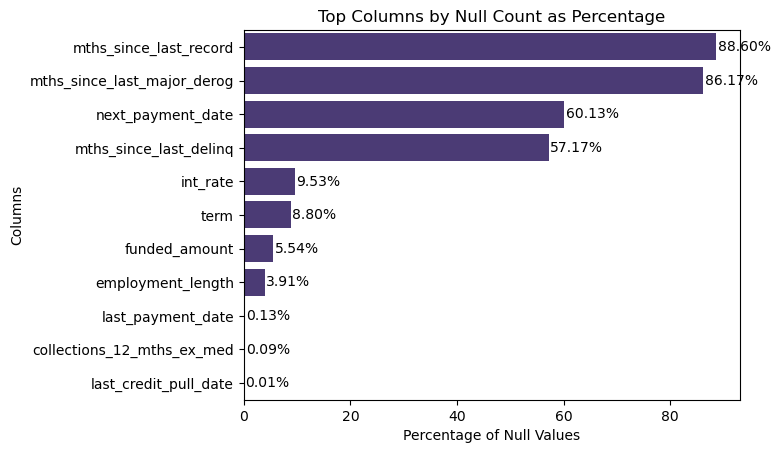

In [16]:
percentage_nulls_by_feature(nulls_info)
# prior to handling

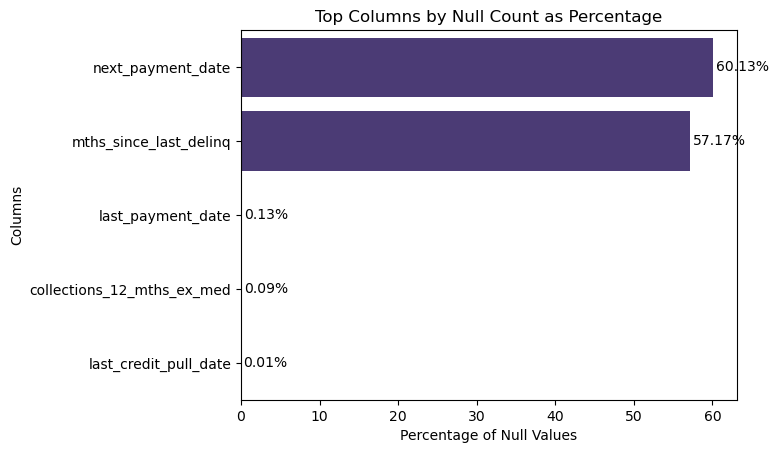

In [35]:
percentage_nulls_by_feature(nulls_info)

In [36]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


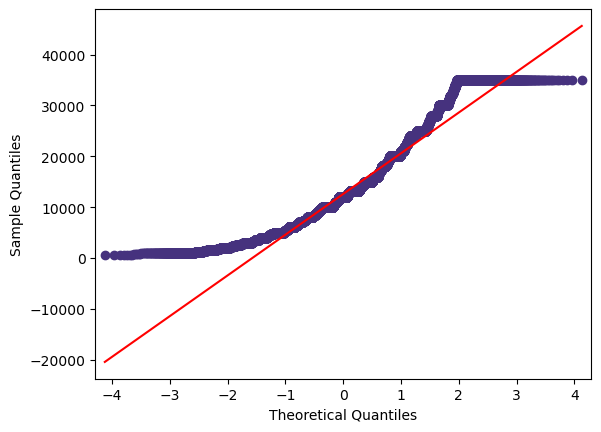

In [37]:
qq = qqplot(df['funded_amount'], scale=1, line='q')